In [1]:
import torch

In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [3]:
RANDOM_SEED = 0

In [4]:
torch.manual_seed(seed=RANDOM_SEED)

In [5]:
random_tensor = torch.rand(7, 7)

In [6]:
random_tensor

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])

In [7]:
another_random_tensor = torch.rand(1, 7).T

In [8]:
another_random_tensor

tensor([[0.4820],
        [0.8198],
        [0.9971],
        [0.6984],
        [0.5675],
        [0.8352],
        [0.2056]])

In [9]:
mm = torch.mm(random_tensor, another_random_tensor)

In [10]:
mm

tensor([[1.8542],
        [1.9611],
        [2.2884],
        [3.0481],
        [1.7067],
        [2.5290],
        [1.7989]])

In [11]:
torch.mps.manual_seed(seed=1234)

In [12]:
torch.manual_seed(1234)

In [13]:
one = torch.rand(2, 3)
two = torch.rand(2, 3)
one.to(device)
two.to(device)

tensor([[0.0518, 0.4681, 0.6738],
        [0.3315, 0.7837, 0.5631]], device='mps:0')

In [14]:
new_mm = torch.mm(one, two.T)

In [15]:
new_mm.max(), new_mm.min(), new_mm.argmax(), new_mm.argmin()

(tensor(0.5617), tensor(0.3647), tensor(3), tensor(0))

In [16]:
torch.manual_seed(7)
rand_tensor = torch.rand(1, 1, 1, 10)

In [17]:
new = rand_tensor.squeeze()
new

tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513])

In [18]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.5.1'

In [19]:
# create data
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# X[:10], y[:10]

In [20]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [21]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [22]:
# plot_predictions()

In [23]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [24]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [26]:
with torch.inference_mode(): 
    y_preds = model_0(X_test)

In [27]:
# plot_predictions(predictions = y_preds)

In [28]:
import torch.optim as optim

loss_fn = nn.L1Loss()
optimizer = optim.SGD(params=model_0.parameters(), lr=0.01)

In [29]:
# model_0.to(device)

In [30]:
train_loss_values = []
test_loss_values = []
epoch_count = []

def train_and_test(epochs):
    for epoch in range(epochs):
        model_0.train()
        train_output = model_0(X_train)
        loss = loss_fn(train_output, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        model_0.eval()
        with torch.inference_mode():  
            test_output = model_0(X_test)
            test_loss = loss_fn(test_output, y_test.type(torch.float))
            if epoch % 10 == 0:
                epoch_count.append(epoch)
                train_loss_values.append(loss.detach().numpy())
                test_loss_values.append(test_loss.detach().numpy())
                print(f'Epoch = {epoch}, Loss = {loss}, Test Loss = {test_loss}')
    print('DONE')

In [31]:
%time train_and_test(100)

Epoch = 0, Loss = 0.31288138031959534, Test Loss = 0.48106518387794495
Epoch = 10, Loss = 0.1976713240146637, Test Loss = 0.3463551998138428
Epoch = 20, Loss = 0.08908725529909134, Test Loss = 0.21729660034179688
Epoch = 30, Loss = 0.053148526698350906, Test Loss = 0.14464017748832703
Epoch = 40, Loss = 0.04543796554207802, Test Loss = 0.11360953003168106
Epoch = 50, Loss = 0.04167863354086876, Test Loss = 0.09919948130846024
Epoch = 60, Loss = 0.03818932920694351, Test Loss = 0.08886633068323135
Epoch = 70, Loss = 0.03476089984178543, Test Loss = 0.0805937647819519
Epoch = 80, Loss = 0.03132382780313492, Test Loss = 0.07232122868299484
Epoch = 90, Loss = 0.02788740023970604, Test Loss = 0.06473556160926819
DONE
CPU times: user 15 ms, sys: 1.12 ms, total: 16.2 ms
Wall time: 15.3 ms


In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

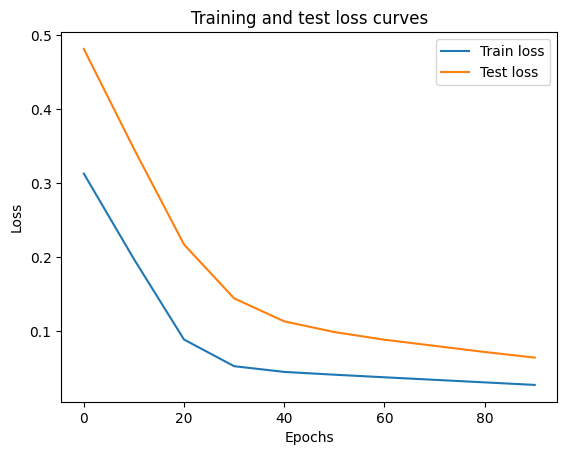

In [33]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [34]:
model_0.eval()

with torch.inference_mode():
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

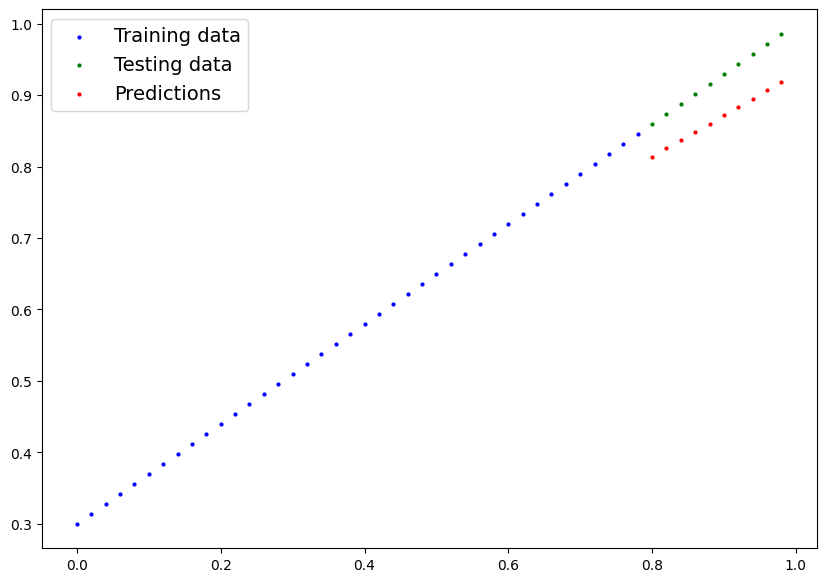

In [35]:
plot_predictions(predictions=y_preds)

In [36]:
# saving the model to device
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [37]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r--  1 poorvibhatia  staff  1680  5 Jan 18:12 models/01_pytorch_workflow_model_0.pth


In [38]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/var/folders/fz/m3b664vj5hq4kdmwr645k9_h0000gn/T/ipykernel_74838/1296048670.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=M

<All keys matched successfully>

In [39]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [40]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [41]:
device = "mps" if torch.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [66]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [67]:
next(model_1.parameters()).device

device(type='cpu')

In [68]:
model_1.to(device) 
next(model_1.parameters()).device

device(type='mps', index=0)

In [69]:
loss_fn = nn.L1Loss()
optimizer = optim.SGD(params=model_1.parameters(), lr=0.01)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

def train_and_test_new(epochs):
    for epoch in range(epochs):
        model_1.train()
        train_output = model_1(X_train)
        loss = loss_fn(train_output, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        model_1.eval()
        with torch.inference_mode():  
            test_output = model_1(X_test)
            test_loss = loss_fn(test_output, y_test)
            if epoch % 100 == 0:
                print(f'Epoch = {epoch}, Loss = {loss}, Test Loss = {test_loss}')
    print('DONE')

In [71]:
train_and_test_new(1000)

Epoch = 0, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
Epoch = 100, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
Epoch = 200, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
Epoch = 300, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
Epoch = 400, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
Epoch = 500, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
Epoch = 600, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
Epoch = 700, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
Epoch = 800, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
Epoch = 900, Loss = 0.0012645028764382005, Test Loss = 0.013801807537674904
DONE


In [72]:
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3025], device='mps:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


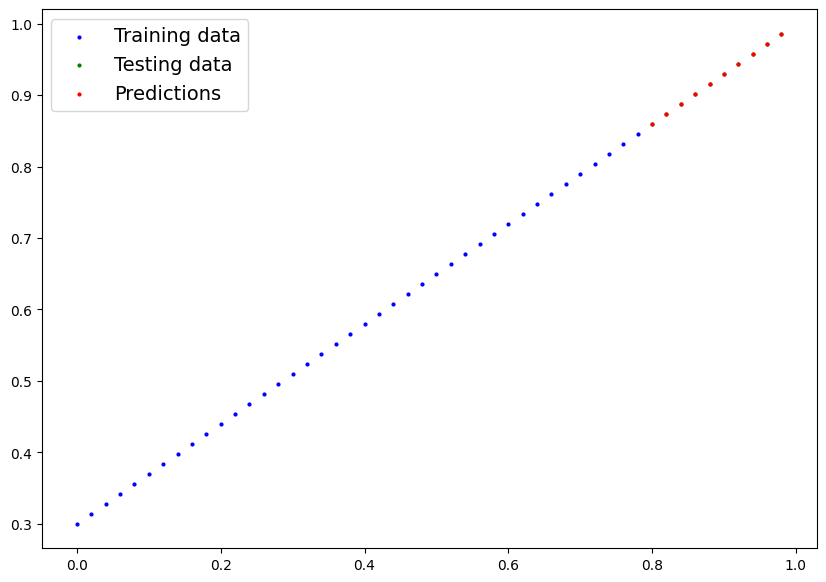

In [74]:
with torch.inference_mode():
    new_y_preds = model_1(X_test)
    
plot_predictions(predictions=new_y_preds.cpu())